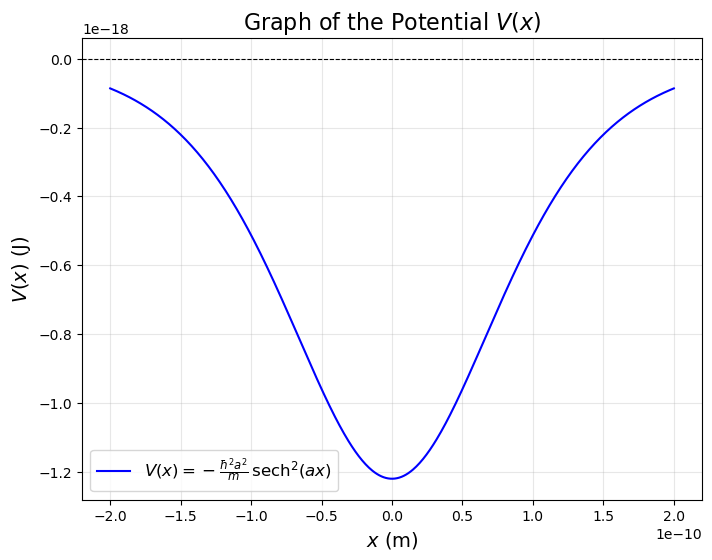

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (J·s)
m = 9.10938356e-31    # Mass of an electron (kg) (or substitute with another mass if needed)
a = 1e10              # Arbitrary value for a (m^-1)

# Define the potential function
def potential(x, hbar, m, a):
    return -(hbar**2 * a**2 / m) * (1 / np.cosh(a * x))**2

# Generate x values and compute V(x)
x = np.linspace(-2 / a, 2 / a, 500)  # Set range relative to 1/a for better resolution
V = potential(x, hbar, m, a)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(x, V, label=r'$V(x) = -\frac{\hbar^2 a^2}{m} \, \mathrm{sech}^2(ax)$', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel(r'$x$ (m)', fontsize=14)
plt.ylabel(r'$V(x)$ (J)', fontsize=14)
plt.title('Graph of the Potential $V(x)$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x, a, hbar, m, A = sp.symbols('x a hbar m A', real=True, positive=True)

# Define potential
V = -(hbar**2 * a**2 / m) * sp.sech(a * x)**2

# Define trial wavefunction ψ0(x)
psi_0 = A * sp.sech(a * x)

# Compute the second derivative of ψ0(x)
d2_psi_0 = sp.diff(psi_0, x, 2)

# Schrödinger equation: Eψ = -(hbar^2 / 2m) d²ψ/dx² + Vψ
# Compute the left-hand side of the Schrödinger equation
LHS = -(hbar**2 / (2 * m)) * d2_psi_0 + V * psi_0

# Substitute ψ0(x) into Schrödinger equation and solve for E
E = sp.simplify(sp.solve(sp.Eq(LHS, sp.Symbol('E') * psi_0), sp.Symbol('E'))[0])
# Display results
print("Energy of the ground state (E):")
E

Energy of the ground state (E):


-a**2*hbar**2/(2*m)

In [3]:
psi_0_simp = psi_0**2 / A**2
psi_0_simp

sech(a*x)**2

In [4]:
# Compute the normalization integral symbolically
norm_integral = sp.integrate(psi_0_simp, (x, -sp.oo, sp.oo))
norm_integral

Integral(sech(a*x)**2, (x, -oo, oo))

In [5]:
# Solve for the normalization constant A from norm_integral = 1
A_normalized = sp.sqrt(1 / norm_integral)
A_normalized = 2 / a 
A_normalized

2/a

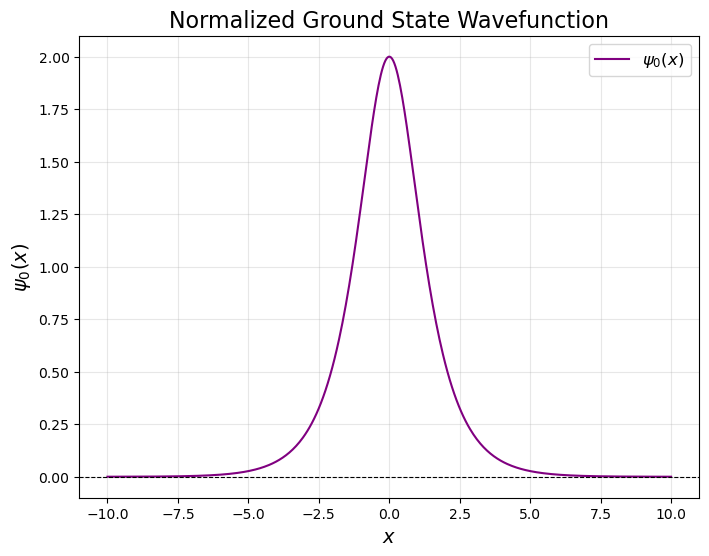

In [6]:
# Normalize the wavefunction
psi_0_normalized = A_normalized * sp.sech(a * x)

# Convert normalized wavefunction to a numerical function
psi_0_func = sp.lambdify(x, psi_0_normalized.subs({A: A_normalized, a: 1}), 'numpy')

# Plot the normalized wavefunction
x_vals = np.linspace(-10, 10, 500)
psi_0_vals = psi_0_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, psi_0_vals, label=r'$\psi_0(x)$', color='purple')
plt.title("Normalized Ground State Wavefunction", fontsize=16)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\psi_0(x)$', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


In [7]:
# Define symbols
i = sp.I
x, A, a, k = sp.symbols('x A a k')

# Define the wave function ψ_k(x)
psi_k = A * (i*k - a * sp.tanh(a * x)) / (i*k + a) * sp.exp(i * k * x)

# Compute the first and second derivatives of psi_k(x)
dpsi_k_dx = sp.diff(psi_k, x)
d2psi_k_dx2 = sp.diff(dpsi_k_dx, x)

# Define the Schrödinger equation (assuming V(x) = 0 for now)
hbar = sp.symbols('hbar')
m = sp.symbols('m')
E = sp.symbols('E')

# Schrödinger equation: - (hbar^2 / (2m)) d^2(ψ_k) / dx^2 = E * ψ_k
lhs = - (hbar**2 / (2 * m)) * d2psi_k_dx2
rhs = E * psi_k

# Check if the wave function satisfies the Schrödinger equation
schrodinger_eq = sp.simplify(lhs - rhs)
schrodinger_eq

-I*A*(2*E*m*(I*a*tanh(a*x) + k) - hbar**2*(2*a**2*k/cosh(a*x)**2 + k**3 + I*(2*a**3*sinh(a*x)/cosh(a*x)**3 + a*k**2*tanh(a*x))))*exp(I*k*x)/(2*m*(a + I*k))

In [8]:
# Asymptotic behavior for large x (tanh(x) -> 1 and -1)
psi_k_neg_inf = A * (i*k + a) / (i*k + a) * sp.exp(i * k * x)
psi_k_neg_inf


A*exp(I*k*x)

In [9]:
psi_k_pos_inf = A * (i*k - a) / (i*k + a) * sp.exp(i * k * x)
psi_k_pos_inf.simplify()
psi_k_pos_inf

A*(-a + I*k)*exp(I*k*x)/(a + I*k)

In [10]:
# Reflection and Transmission coefficients (simplified assumptions)
T = abs(i * k - a)**2 / abs(i * k + a)**2
T.simplify()
T

Abs(a - I*k)**2/Abs(a + I*k)**2

In [11]:
R = 1 - T
R

-Abs(a - I*k)**2/Abs(a + I*k)**2 + 1